In [29]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [30]:
data = pd.read_excel("Online Retail.xlsx")

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [34]:
from sklearn.preprocessing import StandardScaler
from tqdm import trange
from sklearn.cluster import KMeans

# Data Preprocessing

In [35]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [36]:
data.shape

(541909, 8)

In [37]:
data['CustomerID'] = data['CustomerID'].fillna(-1).astype(int).astype('str').replace('-1', 'Unknown')
data['Description'] = data['Description'].str.strip()
data['On Credit'] = data['InvoiceNo'].str.contains('C')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['ItemTotal'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,On Credit,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,NaN,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,NaN,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34


In [38]:
data = data[(data['CustomerID'] != 'Unknown') & (data['UnitPrice'] > 0)].reset_index(drop=True).copy()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,On Credit,ItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,NaN,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,NaN,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,NaN,20.34


In [39]:
new_data =data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
                                            'InvoiceNo': 'count',
                                            'ItemTotal': 'sum'})

In [40]:
new_data

,InvoiceDate,InvoiceNo,ItemTotal
CustomerID,,,
12346,325,2,0.00
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40
...,...,...,...
18280,277,10,180.60
18281,180,7,80.82
18282,7,13,176.60


In [41]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
normalize_df = scaler.fit_transform(new_data)

In [42]:
wcss = []
for each in range(1, 15):
    kmeans = KMeans(n_clusters=each).fit(normalize_df)
    wcss.append(kmeans.inertia_)
    

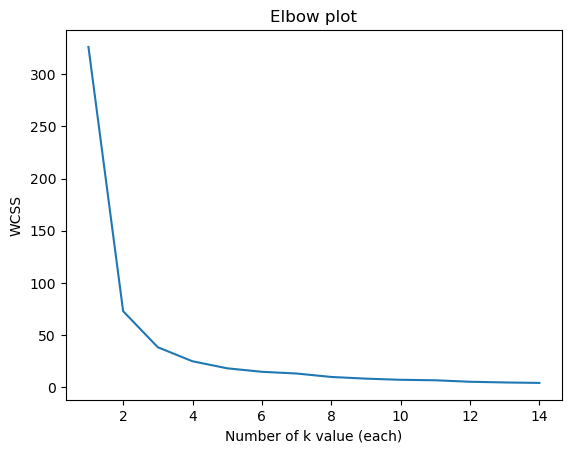

In [43]:
plt.plot(range(1, 15), wcss)
plt.title('Elbow plot')
plt.xlabel("Number of k value (each)")
plt.ylabel("WCSS")
plt.show()

In [44]:
kmeans1 = KMeans(n_clusters=3)
cluster_k = kmeans1.fit_predict(normalize_df)

In [45]:
with_km_df = pd.DataFrame(normalize_df, columns=new_data.columns, index=new_data.index)
with_km_df['cluster'] = cluster_k
with_km_df

,InvoiceDate,InvoiceNo,ItemTotal,cluster
CustomerID,,,,
12346,0.871314,0.000125,0.015109,1
12347,0.002681,0.022676,0.030297,0
12348,0.198391,0.003758,0.021442,0
12349,0.048257,0.009020,0.021303,0
12350,0.828418,0.002005,0.016288,1
...,...,...,...,...
18280,0.742627,0.001128,0.015746,1
18281,0.482574,0.000752,0.015394,2
18282,0.018767,0.001503,0.015731,0


In [46]:
with_km_df['cluster'].value_counts(ascending=True)

cluster
1     634
2     816
0    2921
Name: count, dtype: int64

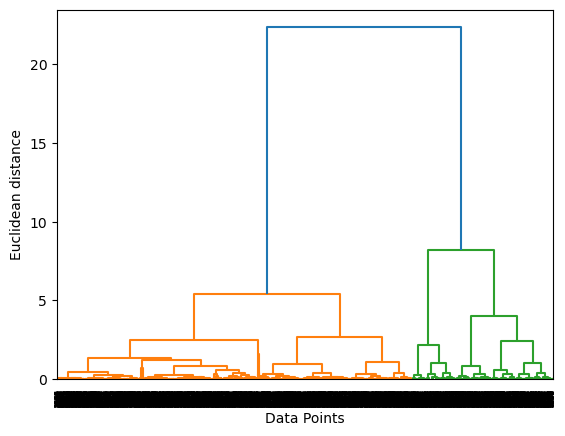

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import confusion_matrix
merging = linkage(normalize_df, method='ward')
dendrogram(merging, leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Euclidean distance')
plt.show()

In [48]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_hc = hc.fit_predict(normalize_df)

In [49]:
with_hc_df = pd.DataFrame(normalize_df, columns=new_data.columns, index=new_data.index)
with_hc_df['cluster'] = cluster_hc
with_hc_df

,InvoiceDate,InvoiceNo,ItemTotal,cluster
CustomerID,,,,
12346,0.871314,0.000125,0.015109,2
12347,0.002681,0.022676,0.030297,0
12348,0.198391,0.003758,0.021442,0
12349,0.048257,0.009020,0.021303,0
12350,0.828418,0.002005,0.016288,2
...,...,...,...,...
18280,0.742627,0.001128,0.015746,2
18281,0.482574,0.000752,0.015394,1
18282,0.018767,0.001503,0.015731,0


In [50]:
with_hc_df['cluster'].value_counts(ascending=True)

cluster
2     391
1     850
0    3130
Name: count, dtype: int64

In [51]:
cluster_mean = with_hc_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'ItemTotal']].mean().reset_index()

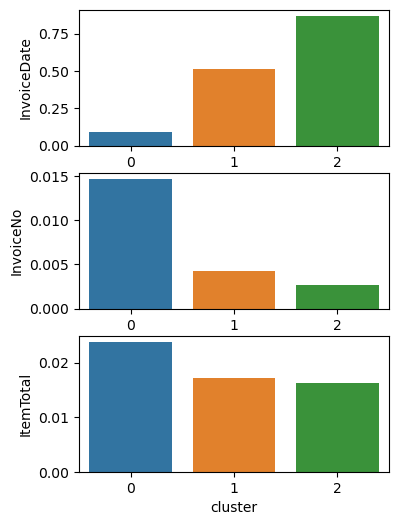

In [52]:
fig, axes = plt.subplots(nrows=3, figsize=(4, 6))
import seaborn as sns
sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='ItemTotal', ax=axes[2])
plt.show()

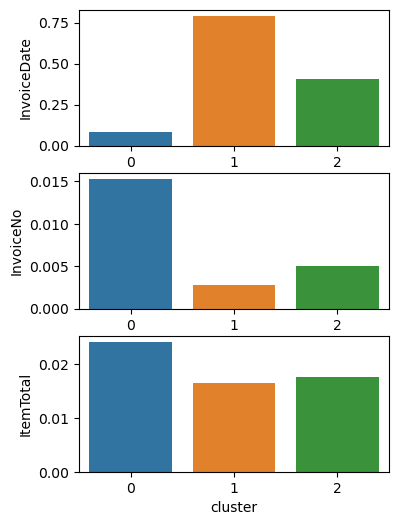

In [53]:
cluster_mean = with_km_df.groupby('cluster')[['InvoiceDate', 'InvoiceNo', 'ItemTotal']].mean().reset_index()

fig, axes = plt.subplots(nrows=3, figsize=(4, 6))

sns.barplot(cluster_mean, x='cluster', y='InvoiceDate', ax=axes[0])
sns.barplot(cluster_mean, x='cluster', y='InvoiceNo', ax=axes[1])
sns.barplot(cluster_mean, x='cluster', y='ItemTotal', ax=axes[2])

plt.show()

In [55]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
X = normalize_df
Y = kmeans.fit_predict(X)

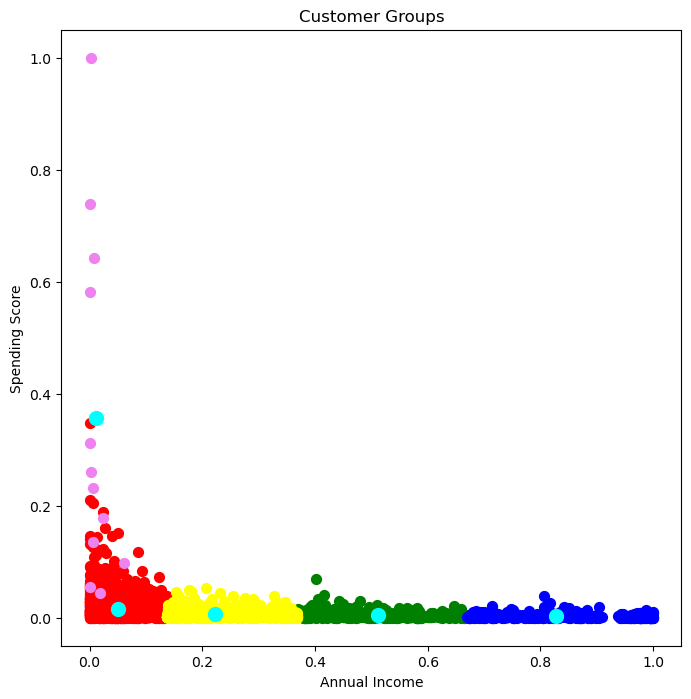

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [57]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
Y = hc.fit_predict(X)

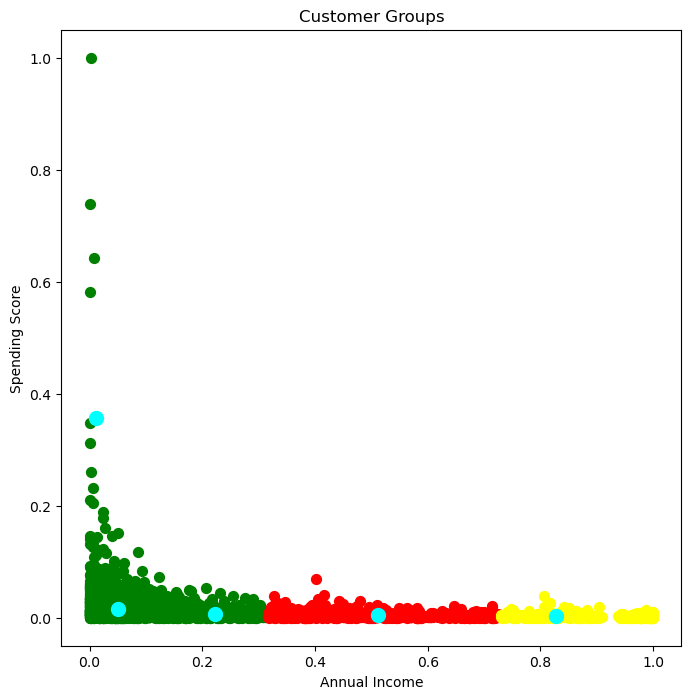

In [58]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()